# LMfit.jl test and development

2024_10_15: IBS

This notebook is intended to monitor the development of the `LMfit.jl` package.

In [2]:
using Pkg
if isfile("Project.toml")
    Pkg.activate(".")
end

using LaTeXStrings # Because of the l"" syntax
using Revise
using CairoMakie
using LMfit

  Activating project at `~/Julia/LMfit/notebooks`


In [5]:
ps = Parameters()
add!(ps, "amp"; value=1.0)
add!(ps, "cen"; value=2.0)
add!(ps, "wid"; value=3.0, vary=false)

Parameters:
	name="cen",	value=2.0,	vary=true,	min=-Inf,	max=Inf,	expr=,	user_data=nothing
	name="wid",	value=3.0,	vary=false,	min=-Inf,	max=Inf,	expr=,	user_data=nothing
	name="amp",	value=1.0,	vary=true,	min=-Inf,	max=Inf,	expr=,	user_data=nothing


In [10]:
# Define an objective function
m = @generate_model gaussian(x, amp, cen, wid) = @. amp * exp(-(x - cen)^2 / (2 * wid^2))
x = range(-10, 10, length=101)
y = gaussian(x, 2.33, 0.21, 1.51) .+ 0.2 .* randn(size(x))
;

# Create parameters automatically
ps = make_params(m; amp=1.0, cen=2.0, wid=3.0)
ps.parameters["wid"].vary = false
display(ps)

Parameters:
	name="cen",	value=-Inf,	vary=true,	min=-Inf,	max=Inf,	expr=,	user_data=nothing
	name="wid",	value=-Inf,	vary=false,	min=-Inf,	max=Inf,	expr=,	user_data=nothing
	name="amp",	value=-Inf,	vary=true,	min=-Inf,	max=Inf,	expr=,	user_data=nothing


In [3]:
# Define an objective function
m = @generate_model gaussian(x, amp, cen, wid) = @. amp * exp(-(x - cen)^2 / (2 * wid^2))

x = range(-10, 10, length=101)
y = gaussian(x, 2.33, 0.21, 1.51) .+ 0.2 .* randn(size(x))
;

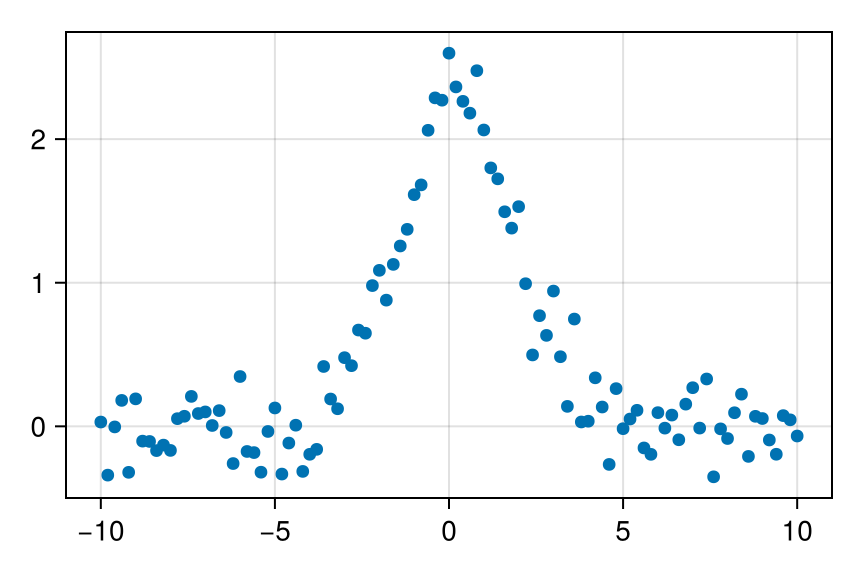

In [4]:
f = Figure(size=(6,4).*72)
ax = Axis(f[1,1])
plot!(ax, x, y)

f

Great!!  So far I have created a model and the associated parameters.

In [5]:
update_vars!(m, ["amp"])


Model("gaussian", gaussian, ["x", "amp", "cen", "wid"], String[], Set(["amp"]), Set(["cen", "wid", "x"]))

In [6]:
Set(m.arg_names)

Set{String} with 4 elements:
  "cen"
  "wid"
  "x"
  "amp"